#**IMPORTING THE NECCESSARY FRAMEWORKS**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv ('/content/sample_data/wfp_food_prices_mwi (1).csv')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

date           0
admin1       489
admin2       489
market         0
latitude     489
longitude    489
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

**FEATURE SELECTION**

In [ ]:
df.drop(columns=[ 'usdprice', 'latitude', 'longitude', 'category', 'unit', 'priceflag', 'currency',],inplace=True)
#since the command was written at first, but all the other coloumns have been dropped too from it

In [ ]:
df.drop(index=0, inplace=True)

In [ ]:
df.drop(columns=[ 'pricetype'],inplace=True)

In [ ]:
df

,date,admin1,admin2,market,commodity,price
1,10/15/1990,NaN,NaN,National Average,Fuel (diesel),1.9
2,10/15/1990,NaN,NaN,National Average,"Fuel (kerosene, paraffin)",1.22
3,8/15/1991,NaN,NaN,National Average,Fuel (diesel),2
4,8/15/1991,NaN,NaN,National Average,"Fuel (kerosene, paraffin)",1.22
5,6/15/1992,NaN,NaN,National Average,Fuel (diesel),2.58
...,...,...,...,...,...,...
47194,2/15/2024,Southern Region,Zomba,Songani,Pigeon peas,1927.27
47195,2/15/2024,Southern Region,Zomba,Thondwe,Maize (new harvest),868.18
47196,2/15/2024,Southern Region,Zomba,Thondwe,Beans,3000
47197,2/15/2024,Southern Region,Zomba,Thondwe,Cowpeas,1963.64


#**FILTERING THE FEATURES (SELECTION OF FEATURES)**

In [ ]:
#filter data based on the date and commodity i want as well as markets and area

# Converting the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Defining the date range
start_date = '2023-01-01'
end_date = '2024-01-31'

# Filtering the data for the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#the commodities and markets being filtered
commodities = ['Maize (new harvest)', 'Beans']

markets= ['Nsikawanjala', 'Lizulu', 'Jenda', 'Mitundu', 'Lunzu']

# Filter the DataFrame
filtered_data = filtered_df[(filtered_df['commodity'].isin(commodities) & (df['market'].str.lower().isin([m.lower() for m in markets])))]

# Print the filtered data or proceed with ML modeling using the filtered data
print(filtered_data)

            date           admin1    admin2        market  \
43310 2023-01-15   Central Region     Dedza  Nsikawanjala   
43386 2023-01-15  Northern Region    Mzimba         Jenda   
43387 2023-01-15  Northern Region    Mzimba         Jenda   
43414 2023-01-15  Southern Region  Blantyre         Lunzu   
43415 2023-01-15  Southern Region  Blantyre         Lunzu   
...          ...              ...       ...           ...   
46449 2024-01-15   Central Region     Dedza  Nsikawanjala   
46581 2024-01-15  Northern Region    Mzimba         Jenda   
46582 2024-01-15  Northern Region    Mzimba         Jenda   
46635 2024-01-15  Southern Region  Blantyre         Lunzu   
46636 2024-01-15  Southern Region  Blantyre         Lunzu   

                 commodity    price  
43310                Beans     1600  
43386  Maize (new harvest)      445  
43387                Beans     1700  
43414  Maize (new harvest)   534.17  
43415                Beans  1795.83  
...                    ...      ...  
4

<ipython-input-46-39ca71e4b20f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_df[(filtered_df['commodity'].isin(commodities) & (df['market'].str.lower().isin([m.lower() for m in markets])))]


#**GRAPHING THE FEATURES (X) WITH THE TARGET (Y)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


## Price (y) vs Commodity (x)

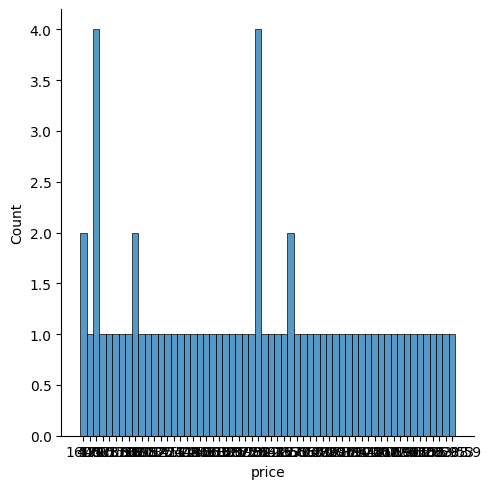

In [ ]:
sns.displot(filtered_data['price'])

<Axes: xlabel='commodity'>

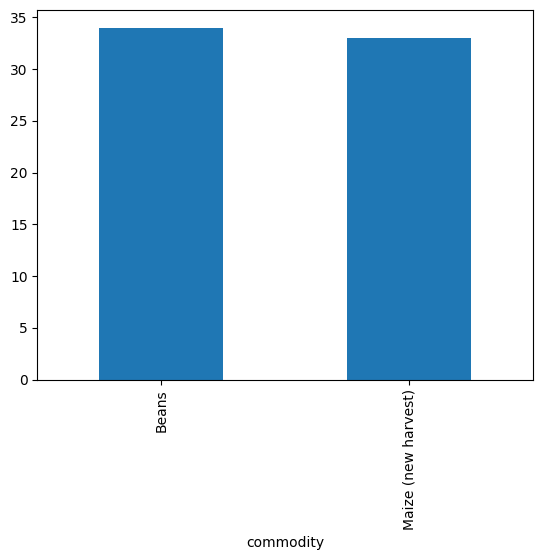

In [ ]:
filtered_data['commodity'].value_counts().plot(kind='bar')

##**Commodity** **vs price**

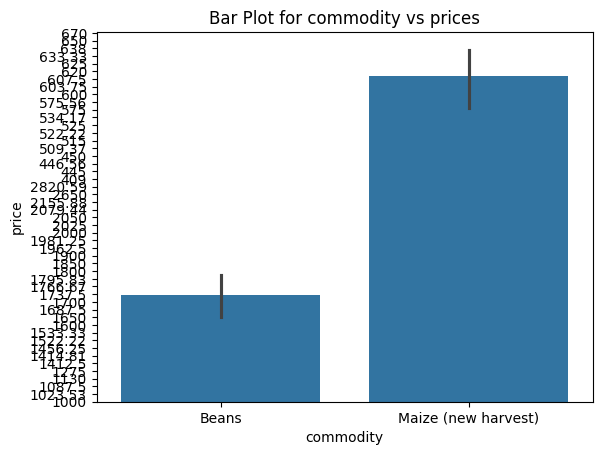

In [ ]:
sns.barplot(x= filtered_data['commodity'], y=filtered_data['price'])
plt.title('Bar Plot for commodity vs prices')
plt.gca().invert_yaxis()
plt.show()

##**Markets vs price**

<Axes: xlabel='market'>

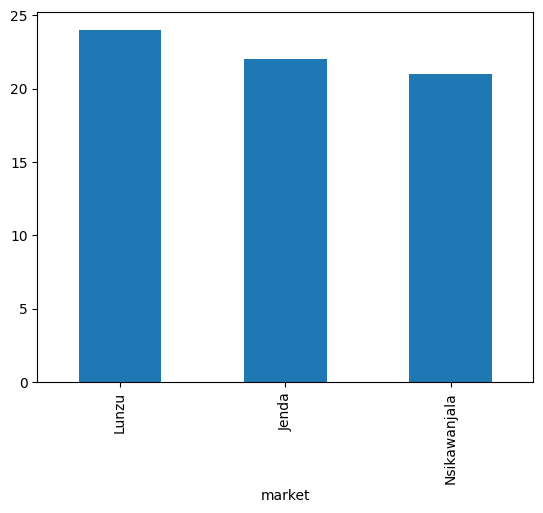

In [ ]:
filtered_data['market'].value_counts().plot(kind='bar')

In [ ]:
sns.barplot(x= filtered_data['market'], y=filtered_data['price'])
plt.title('bar Plot of market vs price')
plt.gca().invert_yaxis()
plt.show()

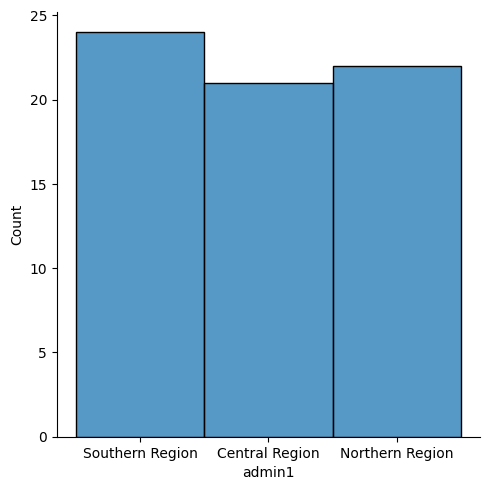

In [ ]:
sns.displot(filtered_data['admin1'])

In [ ]:
sns.scatterplot(x=filtered_data ['admin1'], y = filtered_data['price'])

In [ ]:
filtered_data['date'].value_counts()

date
2024-01-15    6
2023-04-15    6
2023-08-15    6
2023-06-15    6
2023-07-15    6
2023-09-15    6
2023-10-15    6
2023-11-15    6
2023-12-15    6
2023-01-15    5
2023-03-15    4
2023-05-15    2
2023-02-15    2
Name: count, dtype: int64